# Wolfiverse

In this tutorial, we show how Qiskit is used in the game.

In [85]:
# imports
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_bloch_multivector, plot_histogram

## Random outcome
Qiskit is used as a random number generator to determine the destination of universe ($|0\rangle$ for little red riding hood or $|1\rangle$ for three little pigs) when the Wolf leaves the universe of Peter. The random destination is determined by a single-shot measurement outcome of a qubit with $|+\rangle = |0\rangle + |1\rangle$ state, realized by H gate. Let's check it in Qiskit.

        ┌───┐
q_0: |0>┤ H ├
        └───┘
 c_0: 0 ═════
             


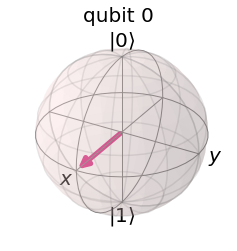

In [75]:
circuit = QuantumCircuit(1,1)
circuit.h(0)
print(circuit.draw())
# show statevector in Bloch sphere
statevector = execute(circuit, Aer.get_backend('statevector_simulator')).result().get_statevector()
plot_bloch_multivector(statevector)

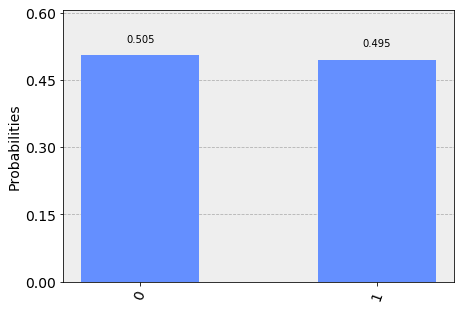

In [78]:
# do measurement to check probability distribution
circuit.measure(0,0)
counts = execute(circuit, Aer.get_backend('qasm_simulator'),shots=1024).result().get_counts()
plot_histogram(counts)

As you can see from measurement outcome histogram above, the outcome is 50%-50%.

## Eat Peter

The probability of eating Peter is also determined by the measurement outcome of a qubit, but in this case, its state changes as the player picks up gates (items) along the storyline. At the beginning of the game, the state is $|0\rangle$, with 0% chance of eating Peter ($|1\rangle$). 

### Initial circuit: I, I, I

        
q_0: |0>
        
 c_0: 0 
        


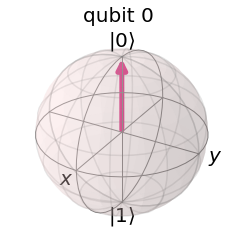

In [74]:
circuit = QuantumCircuit(1,1)
print(circuit.draw())
statevector = execute(circuit, Aer.get_backend('statevector_simulator')).result().get_statevector()
plot_bloch_multivector(statevector)

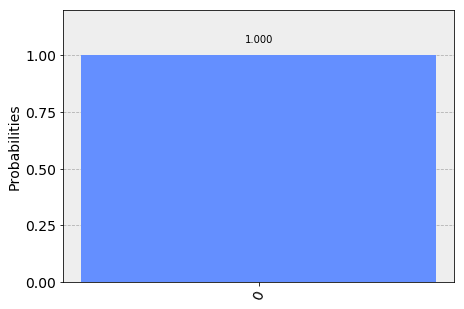

In [49]:
circuit.measure(0,0)
counts = execute(circuit, Aer.get_backend('qasm_simulator'),shots=1024).result().get_counts()
plot_histogram(counts)

### Next circuit: H, I, I
As the game progress, the player first pick up a pie or a matchbox in the game, which is a H gate at the backend. The state of the qubit is changed to |+> and the chance of eating Peter is increased to 50%. 

        ┌───┐
q_0: |0>┤ H ├
        └───┘
 c_0: 0 ═════
             


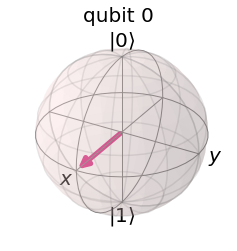

In [79]:
circuit = QuantumCircuit(1,1)
circuit.h(0)
print(circuit.draw())
statevector = execute(circuit, Aer.get_backend('statevector_simulator')).result().get_statevector()
plot_bloch_multivector(statevector)

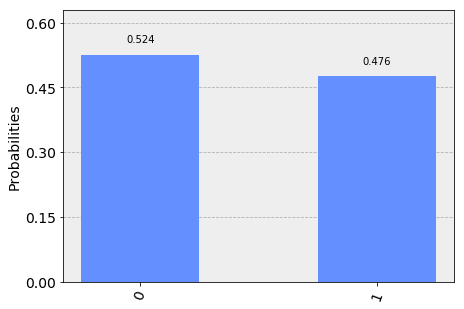

In [80]:
circuit.measure(0,0)
counts = execute(circuit, Aer.get_backend('qasm_simulator'),shots=1024).result().get_counts()
plot_histogram(counts)

### Next circuit: H, Z, I
The next gate that gets picked up is Z gate, which change the qubit state to $|-\rangle = |0\rangle - |1\rangle$. The chance of eating Peter remains at 50%, but when combined with the last H gate, the chance of eating Peter increases to 100%, because HZH$|0\rangle = |1\rangle$.

        ┌───┐┌───┐
q_0: |0>┤ H ├┤ Z ├
        └───┘└───┘
 c_0: 0 ══════════
                  


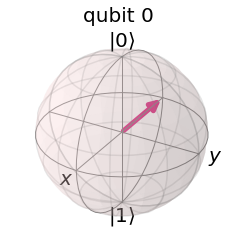

In [81]:
circuit = QuantumCircuit(1,1)
circuit.h(0)
circuit.z(0)
print(circuit.draw())
statevector = execute(circuit, Aer.get_backend('statevector_simulator')).result().get_statevector()
plot_bloch_multivector(statevector)

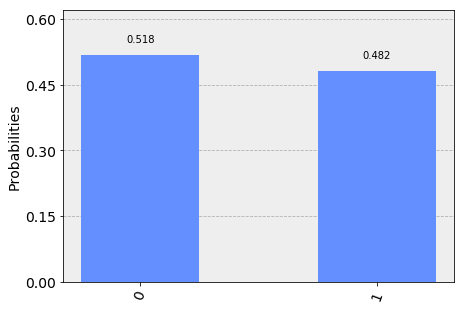

In [57]:
circuit.measure(0,0)
counts = execute(circuit, Aer.get_backend('qasm_simulator'),shots=1024).result().get_counts()
plot_histogram(counts)

### Last circuit: H, Z, H

        ┌───┐┌───┐┌───┐
q_0: |0>┤ H ├┤ Z ├┤ H ├
        └───┘└───┘└───┘
 c_0: 0 ═══════════════
                       


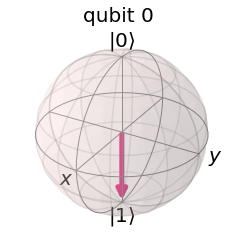

In [83]:
circuit = QuantumCircuit(1,1)
circuit.h(0)
circuit.z(0)
circuit.h(0)
print(circuit.draw())
statevector = execute(circuit, Aer.get_backend('statevector_simulator')).result().get_statevector()
plot_bloch_multivector(statevector)

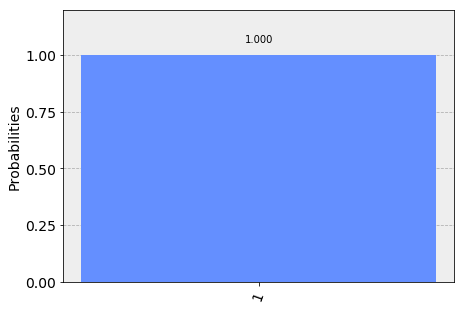

In [84]:
circuit.measure(0,0)
counts = execute(circuit, Aer.get_backend('qasm_simulator'),shots=1024).result().get_counts()
plot_histogram(counts)